In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	6
float64		column 3	21
int64		column 4	0
float64		column 5	9
float64		column 6	6
float64		column 7	6
float64		column 8	6
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,677.000000,662.000000,683.000000,674.000000,677.000000,677.000000,677.000000,683.000000
mean,4.442167,3.141802,3.163142,2.830161,3.218101,3.530281,3.446086,2.843427,1.603221
std,2.820761,3.062560,2.958713,2.864562,2.219373,3.635100,2.452894,3.032224,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

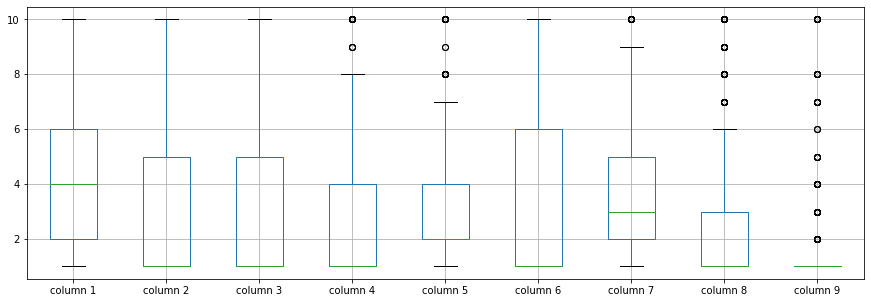

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.141802
column 3    3.163142
column 4    2.830161
column 5    3.218101
column 6    3.530281
column 7    3.446086
column 8    2.843427
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.642127,0.662690,0.487829,0.532647,0.592676,0.552276,0.533315,0.350957
column 2,0.642127,1.000000,0.905033,0.707565,0.750903,0.688452,0.754685,0.716872,0.463092
column 3,0.662690,0.905033,1.000000,0.685430,0.719848,0.716248,0.733087,0.718759,0.446492
column 4,0.487829,0.707565,0.685430,1.000000,0.597492,0.670444,0.670074,0.596856,0.418898
column 5,0.532647,0.750903,0.719848,0.597492,1.000000,0.584787,0.611869,0.631583,0.480508
column 6,0.592676,0.688452,0.716248,0.670444,0.584787,1.000000,0.677514,0.580809,0.342039
column 7,0.552276,0.754685,0.733087,0.670074,0.611869,0.677514,1.000000,0.659830,0.342156
column 8,0.533315,0.716872,0.718759,0.596856,0.631583,0.580809,0.659830,1.000000,0.436090
column 9,0.350957,0.463092,0.446492,0.418898,0.480508,0.342039,0.342156,0.436090,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+64,9+64+64,9+64+64,9+64+64+64+64,9+64+64+64,9+64+64,9+64,9], vae_layer = False, seed = 640)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.44008491152809
Epoch: 1 , loss: 36.36673545837402
Epoch: 2 , loss: 35.912934575762065
Epoch: 3 , loss: 35.385631652105424
Epoch: 4 , loss: 31.340973626999627
Epoch: 5 , loss: 29.80025055294945
Epoch: 6 , loss: 29.402720405941917
Epoch: 7 , loss: 29.203068733215332
Epoch: 8 , loss: 28.828942525954474
Epoch: 9 , loss: 28.34262804757981
Epoch: 10 , loss: 28.27032688685826
Epoch: 11 , loss: 27.27213818686349
Epoch: 12 , loss: 27.5569878532773
Epoch: 13 , loss: 26.89550154549735
Epoch: 14 , loss: 26.848103977385023
Epoch: 15 , loss: 26.00881658281599
Epoch: 16 , loss: 25.391028858366468
Epoch: 17 , loss: 25.205660365876696
Epoch: 18 , loss: 25.090016047159832
Epoch: 19 , loss: 25.064331531524658
Epoch: 20 , loss: 25.289621171497163
Epoch: 21 , loss: 24.52735408147176
Epoch: 22 , loss: 24.60482368015108
Epoch: 23 , loss: 24.215538070315407
Epoch: 24 , loss: 23.45305363337199
Epoch: 25 , loss: 24.3562083244

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
679,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
680,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0
681,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(27.303549927215208, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.08142336414133934

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [20]:
imputations[-1].to_excel("BCW_AG_1(imp).xlsx", index=False, header=False)